In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#df1 = pd.read_csv ('student_after_score.csv')
df1 = pd.read_csv ('/Users/Elena/Desktop/ANACONDA/test/student_after_score.csv')
print(df1.head(5))

   student_id  after_score
0           1           92
1           2           79
2           3           92
3           4           90
4           5           98


In [3]:
df2 = pd.read_csv ('/Users/Elena/Desktop/ANACONDA/test/student_before_score.csv')
print(df2.head(5))

   student_id  before_score
0           1            75
1           2            81
2           3            58
3           4            47
4           5            76


In [4]:
df3 = pd.read_csv ('/Users/Elena/Desktop/ANACONDA/test/student_group.csv')
print(df3.head())

   student_id      group
0           1  no_course
1           2     course
2           3     course
3           4     course
4           5     course


#### Определим количество студентов прошедших обучение и не обучавшихся

In [5]:
no_course = df3[df3['group'] == 'no_course']
cnt_no_course = len(no_course)
course = df3[df3['group'] == 'course']
cnt_course = len(course)
print('Количество студентов не прошедших обучение:', cnt_no_course)
print('Количество студентов прошедших обучение:', cnt_course)

Количество студентов не прошедших обучение: 512
Количество студентов прошедших обучение: 488


#### для дальнейшей работы объединим датафреймы

In [6]:
data = df1.join(df2, rsuffix='_right')
print(data)
    # df_join_no_duplicates = df1.set_index('user_id').join(df2.set_index('user_id')) 
     
     #print(df_join_no_duplicates) 


     student_id  after_score  student_id_right  before_score
0             1           92                 1            75
1             2           79                 2            81
2             3           92                 3            58
3             4           90                 4            47
4             5           98                 5            76
..          ...          ...               ...           ...
995         996           92               996            48
996         997           93               997            55
997         998           84               998            47
998         999           74               999            64
999        1000           74              1000            59

[1000 rows x 4 columns]


In [7]:
data_fin = data.join(df3, rsuffix='_right')
print(data_fin)

     student_id  after_score  student_id_right  before_score  \
0             1           92                 1            75   
1             2           79                 2            81   
2             3           92                 3            58   
3             4           90                 4            47   
4             5           98                 5            76   
..          ...          ...               ...           ...   
995         996           92               996            48   
996         997           93               997            55   
997         998           84               998            47   
998         999           74               999            64   
999        1000           74              1000            59   

     student_id_right      group  
0                   1  no_course  
1                   2     course  
2                   3     course  
3                   4     course  
4                   5     course  
..                ...

#### Посмотрим основную информацию о датафрейме с помощью метода info()

In [8]:
data_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   student_id        1000 non-null   int64 
 1   after_score       1000 non-null   int64 
 2   student_id_right  1000 non-null   int64 
 3   before_score      1000 non-null   int64 
 4   student_id_right  1000 non-null   int64 
 5   group             1000 non-null   object
dtypes: int64(5), object(1)
memory usage: 47.0+ KB


#### Выведем количество пропущенных значений

In [9]:
data_fin.isna().sum()

student_id          0
after_score         0
student_id_right    0
before_score        0
student_id_right    0
group               0
dtype: int64

#### Проверим количество дубликатов

In [10]:
data_fin.duplicated().sum()

0

#### Прежде всего посмотрим  нюансы распределения в числах: 
среднее, медиану, количество наблюдений в выборке и разброс их значений. Такие характеристики, дающие представление о выборке, входят в числовое описание данных. В Python его получают методом describe() (пер. «описать, охарактеризовать»). Результат работы метода — список характерных значений:

In [11]:
print(data_fin.describe())

        student_id  after_score  student_id_right  before_score  \
count  1000.000000  1000.000000       1000.000000    1000.00000   
mean    500.500000    84.623000        500.500000      63.92500   
std     288.819436     8.641154        288.819436      14.59851   
min       1.000000    70.000000          1.000000      40.00000   
25%     250.750000    77.000000        250.750000      51.00000   
50%     500.500000    85.000000        500.500000      64.00000   
75%     750.250000    92.000000        750.250000      77.00000   
max    1000.000000    99.000000       1000.000000      89.00000   

       student_id_right  
count       1000.000000  
mean         500.500000  
std          288.819436  
min            1.000000  
25%          250.750000  
50%          500.500000  
75%          750.250000  
max         1000.000000  


#### На основе полученной информации проведем категоризацию данных.
На основании диапазонов, указанных ниже, создадим в датафрейме data столбец category_before_score с категориями:

0–25 — 'D';
26–50 — 'C';
51–75 — 'B';
76–100 — 'A';


In [12]:
def category_before_score(i):
    try:
        if 0 <= i <= 25:
            return 'D'
        elif 26 <= i <= 50:
            return 'C'
        elif 51 <= i <= 75:
            return 'B'
        elif 76 <= i <= 100:
            return 'A'
    except:
        pass

На основании данных диапазонов, создадим в датафрейме data столбец category_after_score с теми же категориями


In [13]:
def category_after_score(i):
    try:
        if 0 <= i <= 25:
            return 'D'
        elif 26 <= i <= 50:
            return 'C'
        elif 51 <= i <= 75:
            return 'B'
        elif 76 <= i <= 100:
            return 'A'
    except:
        pass

In [14]:
data_fin['category_before_score'] = data['before_score'].apply(category_before_score)

In [15]:
data_fin['category_after_score'] = data['after_score'].apply(category_before_score)

In [16]:
print(data_fin.head(10))

   student_id  after_score  student_id_right  before_score  student_id_right  \
0           1           92                 1            75                 1   
1           2           79                 2            81                 2   
2           3           92                 3            58                 3   
3           4           90                 4            47                 4   
4           5           98                 5            76                 5   
5           6           76                 6            67                 6   
6           7           75                 7            69                 7   
7           8           90                 8            88                 8   
8           9           82                 9            53                 9   
9          10           94                10            67                10   

       group category_before_score category_after_score  
0  no_course                     B                    A  
1  

#### Есть ли зависимость между уровнем оценки и прошедшим обучением?

Определим категории оценок студентов до обучения и после прохождения обучения:

In [17]:

print('Категории оценок до проведенного обучения:', data_fin['category_before_score'].value_counts())

Категории оценок до проведенного обучения: B    493
A    272
C    235
Name: category_before_score, dtype: int64


In [18]:
print('Категории оценок после проведенного обучения:',data_fin['category_after_score'].value_counts())

Категории оценок после проведенного обучения: A    799
B    201
Name: category_after_score, dtype: int64


### Посмотрим распределение оценок по категориям до проведения обучения и последующий результат

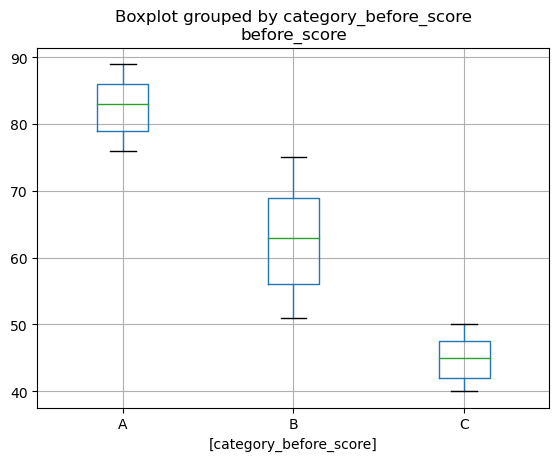

In [19]:

boxplot = data_fin.boxplot(column=['before_score' ], by = ['category_before_score'])


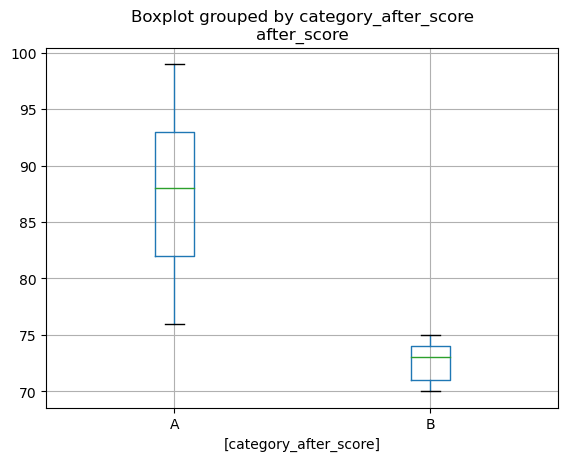

In [20]:
boxplot = data_fin.boxplot(column=['after_score' ], by = ['category_after_score'])

<Axes: xlabel='category_after_score', ylabel='after_score'>

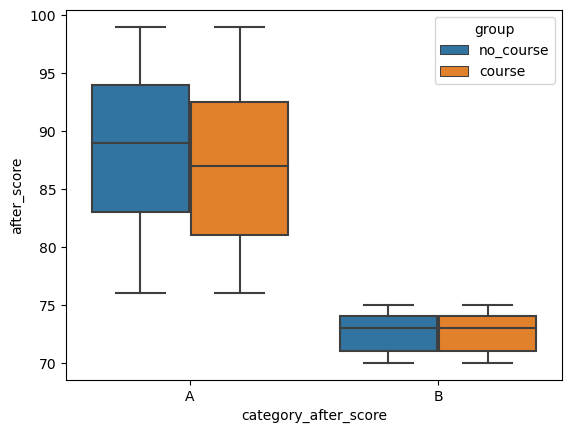

In [25]:
sns.boxplot(data = data_fin , x = 'category_after_score' , y = 'after_score' , hue = 'group')

In [40]:
import plotly.express as px
df = px.data.tips()
fig = px.box(data_fin, x="category_after_score", y="after_score")
fig.show()

#### С помощью сводной таблицы посмотрим на влияние/отсутствие влияния обучения на курсах на результат проведенных испытаний 

In [22]:
# Создаем таблицу методом pivot()
group_total = data_fin.pivot_table(index='category_after_score', columns='group', values='student_id', aggfunc='count')
# Создаем столбцы
group_total.columns = ['no_course', 'course']
# Считаем долю студентов прошедших и непрошедших обучение по категориям
group_total['share_of_cat'] = group_total['course'] / (group_total['course'] + group_total['no_course'])
# Переводим значения в столбце доля дожников в проценты
group_total['share_of_cat'] = group_total['share_of_cat'].map('{:.1%}'.format)
# Сортируем по столбцу долястудентов по убыванию
group_total.sort_values(by='share_of_cat', ascending=False)

,no_course,course,share_of_cat
category_after_score,,,
A,387,412,51.6%
B,101,100,49.8%


## ВЫВОДЫ.
Как мы видим, после проведенного обучения количество высоких оценок (категория А) выросло на 25 и составляет более половины всех студентов, оценки самых низких категорий С и D после проведенного обучения отсутствуют. Однако, из приведенных графиков можно заметить, что медианное значение самой высокой категории оценок у студентов, прошедших обучение, несколько ниже, чем у студентов, необучавшихся на курсах, хотя общее количество в данном сегменте возросло. 